## Import required libraries

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [115]:
data = pd.read_csv('deliveries.csv')
data.head()                   

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [116]:
matches = pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Perform EDA

In [117]:
data.shape

(179078, 21)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [119]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,179078.0,1802.252957,3472.322805,1.0,190.0,379.0,567.0,11415.0
inning,179078.0,1.482952,0.502074,1.0,1.0,1.0,2.0,5.0
over,179078.0,10.162488,5.677684,1.0,5.0,10.0,15.0,20.0
ball,179078.0,3.615587,1.806966,1.0,2.0,4.0,5.0,9.0
is_super_over,179078.0,0.000452,0.021263,0.0,0.0,0.0,0.0,1.0
wide_runs,179078.0,0.036721,0.251161,0.0,0.0,0.0,0.0,5.0
bye_runs,179078.0,0.004936,0.116480,0.0,0.0,0.0,0.0,4.0
legbye_runs,179078.0,0.021136,0.194908,0.0,0.0,0.0,0.0,5.0
noball_runs,179078.0,0.004183,0.070492,0.0,0.0,0.0,0.0,5.0
penalty_runs,179078.0,0.000056,0.016709,0.0,0.0,0.0,0.0,5.0


In [120]:
matches.shape

(756, 18)

In [121]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [122]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [123]:
matches.drop(columns = ['umpire3'], inplace = True)

In [124]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usag

### Merge the two datasets

In [125]:
merge_df = pd.merge(data,matches,left_on='match_id',right_on='id')
merge_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


### Find & Handle NULL values

In [126]:
data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [127]:
matches.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [128]:
matches[matches['city'].isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [129]:
matches['city'] = matches['city'].fillna('Dubai')

In [130]:
matches.dropna(axis = 0, inplace = True)

In [131]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

## Find most successfull team

In [132]:
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan


In [133]:
most_wins = matches['winner'].value_counts()

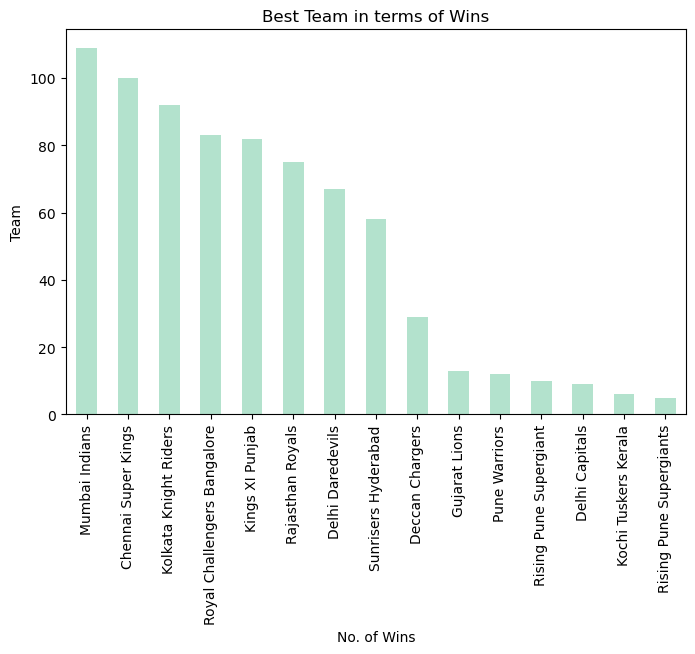

In [134]:
plt.figure(figsize=(8,5))
most_wins.plot(kind = 'bar', colormap = plt.get_cmap('Pastel2'))
plt.title('Best Team in terms of Wins')
plt.ylabel('Team')
plt.xlabel('No. of Wins')
plt.xticks(rotation = 90)
plt.show()

In [135]:
max_id = matches.groupby('season')['id'].max()

### Most wins in Finals

In [138]:
champions = []

for i in range(0,12):
    result = matches.loc[matches['id'] == max_id.iloc[i], 'winner'].values
    champions.append(result[0])
    

In [139]:
champions = pd.DataFrame(champions)

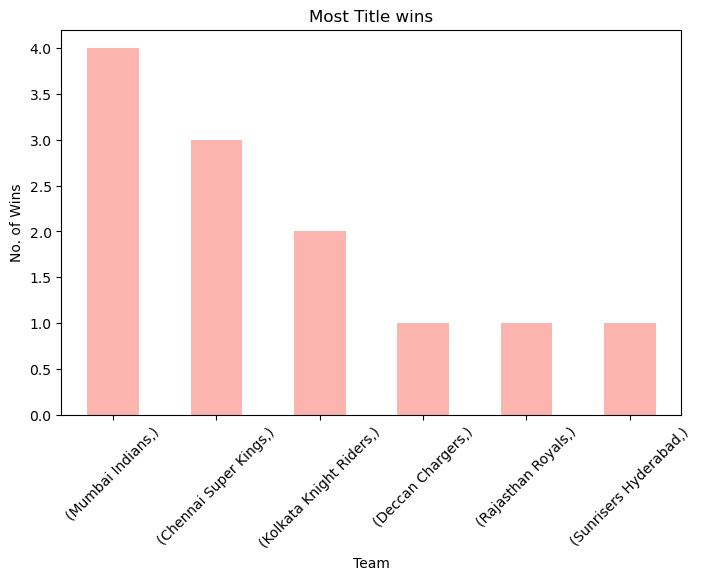

In [140]:
plt.figure(figsize=(8,5))
champions.value_counts().plot(kind = 'bar', colormap = plt.get_cmap('Pastel1'))
plt.title('Most Title wins')
plt.xlabel('Team')
plt.ylabel('No. of Wins')
plt.xticks(rotation = 45)
plt.show()

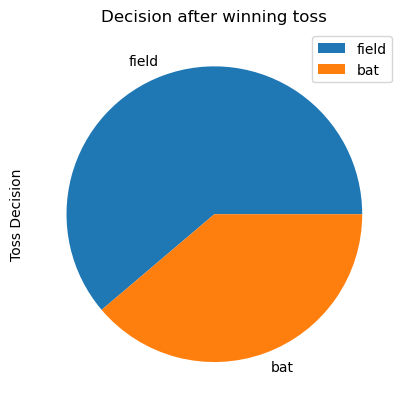

In [141]:
matches['toss_decision'].value_counts().plot(kind='pie', legend=True)
plt.ylabel('Toss Decision')
plt.title('Decision after winning toss')
plt.show()

In [142]:
bat_first = matches[(matches['toss_winner'] == matches['winner']) & (matches['win_by_runs'] > 0)]

In [143]:
bowl_first = matches[(matches['toss_winner'] == matches['winner']) & (matches['win_by_wickets'] > 0)]

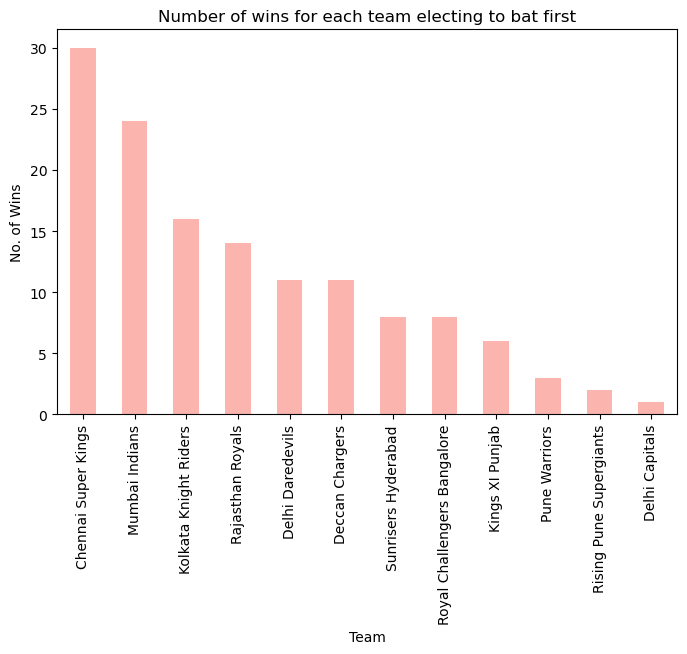

In [144]:
plt.figure(figsize=(8,5))
bat_first['winner'].value_counts().plot(kind = 'bar', colormap = plt.get_cmap('Pastel1'))
plt.title('Number of wins for each team electing to bat first')
plt.xlabel('Team')
plt.ylabel('No. of Wins')
plt.xticks(rotation = 90)
plt.show()

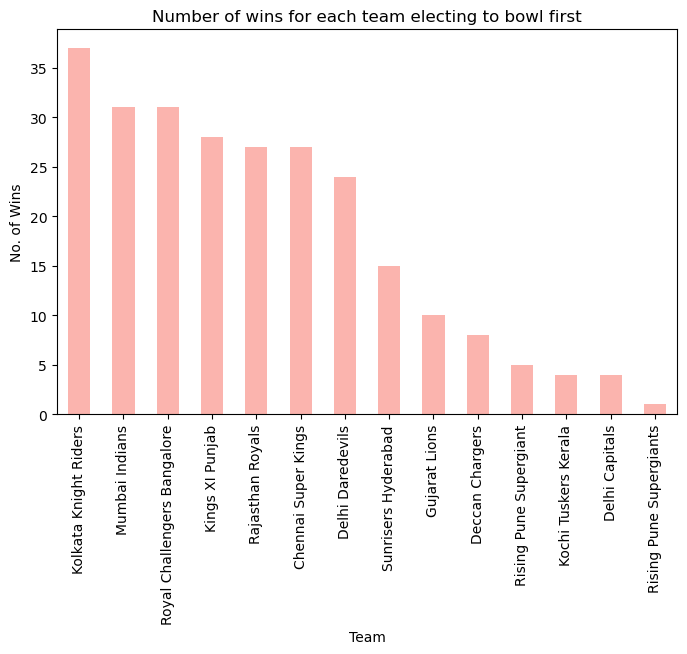

In [145]:
plt.figure(figsize=(8,5))
bowl_first['winner'].value_counts().plot(kind = 'bar', colormap = plt.get_cmap('Pastel1'))
plt.title('Number of wins for each team electing to bowl first')
plt.xlabel('Team')
plt.ylabel('No. of Wins')
plt.xticks(rotation = 90)
plt.show()

In [146]:
win_toss_win_match = matches[(matches['toss_winner'] == matches['winner'])]

lose_toss_win_match = matches[(matches['toss_winner'] != matches['winner'])]

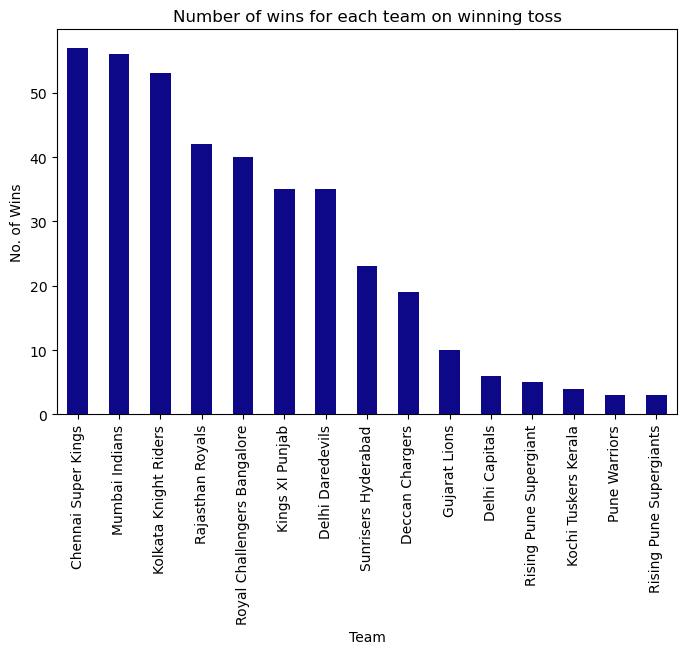

In [147]:
plt.figure(figsize=(8,5))
win_toss_win_match['winner'].value_counts().plot(kind = 'bar', colormap = plt.get_cmap('plasma'))
plt.title('Number of wins for each team on winning toss')
plt.xlabel('Team')
plt.ylabel('No. of Wins')
plt.xticks(rotation = 90)
plt.show()

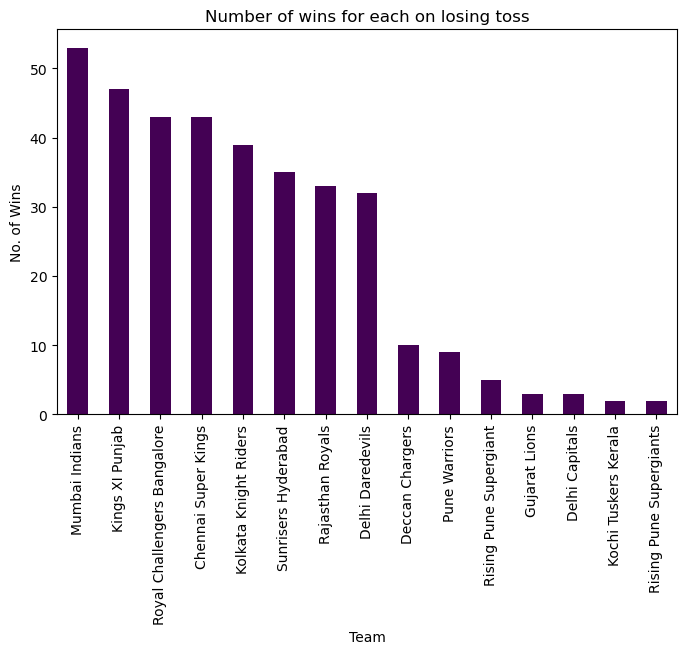

In [148]:
plt.figure(figsize=(8,5))
lose_toss_win_match['winner'].value_counts().plot(kind = 'bar', colormap = plt.get_cmap('viridis'))
plt.title('Number of wins for each on losing toss')
plt.xlabel('Team')
plt.ylabel('No. of Wins')
plt.xticks(rotation = 90)
plt.show()

In [149]:
city_wins_count = matches.groupby(['team1', 'city'])['winner'].count().reset_index()
city_wins_count

,team1,city,winner
0,Chennai Super Kings,Abu Dhabi,2
1,Chennai Super Kings,Ahmedabad,1
2,Chennai Super Kings,Bangalore,4
3,Chennai Super Kings,Centurion,3
4,Chennai Super Kings,Chandigarh,2
...,...,...,...
213,Sunrisers Hyderabad,Mumbai,6
214,Sunrisers Hyderabad,Pune,3
215,Sunrisers Hyderabad,Raipur,2
216,Sunrisers Hyderabad,Sharjah,1


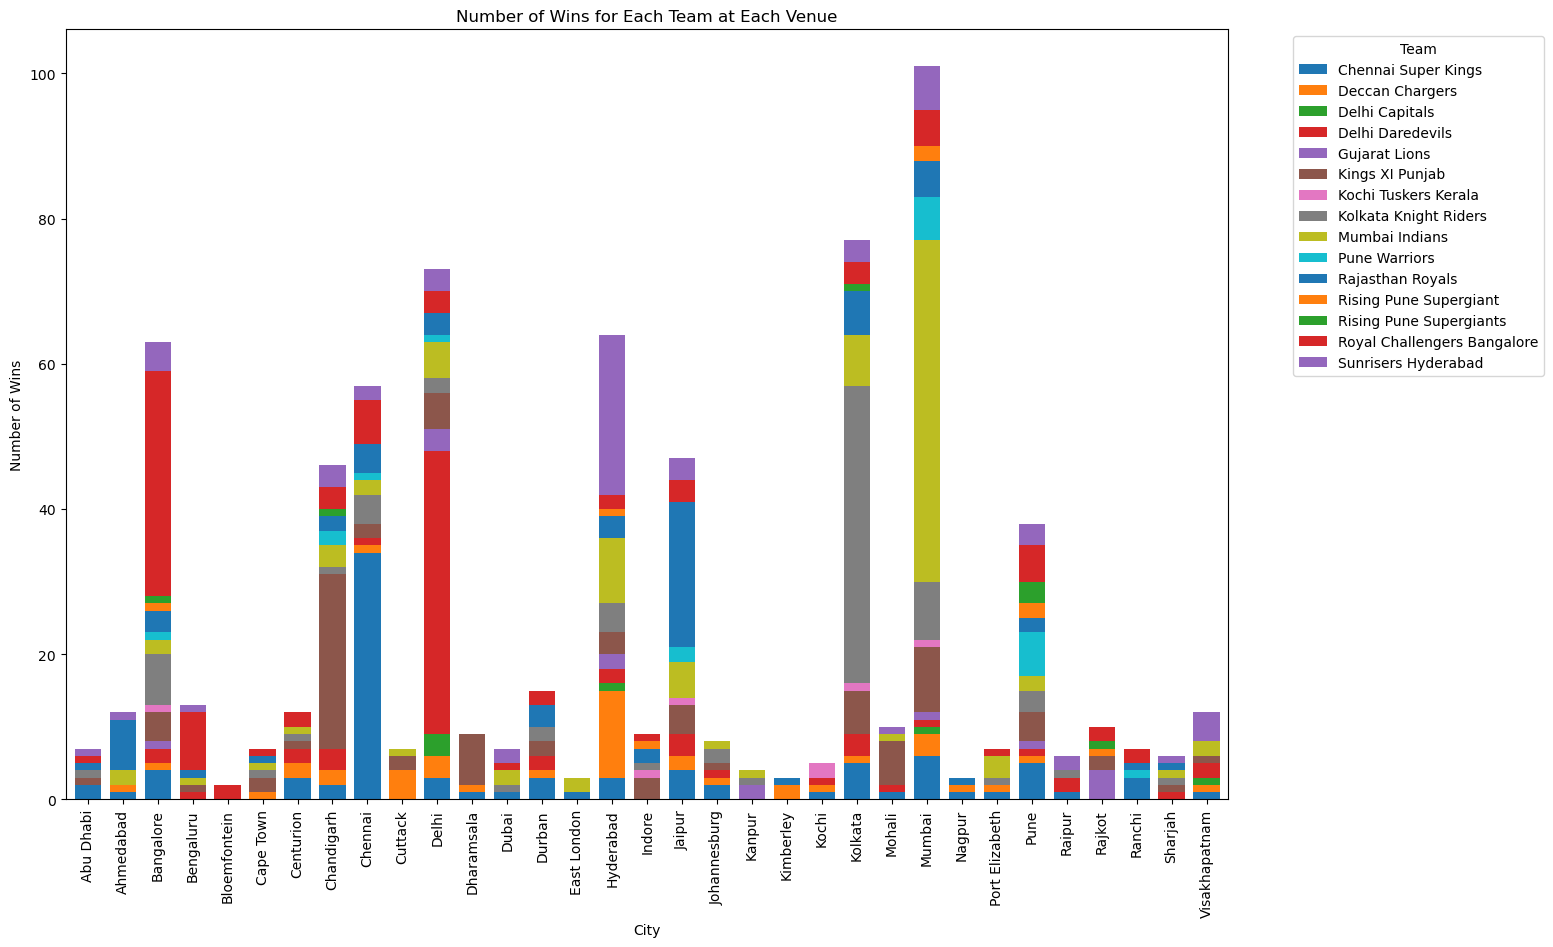

In [150]:
pivot_df = city_wins_count.pivot(index='city', columns='team1', values='winner')
fig, ax = plt.subplots(figsize=(15, 10))
pivot_df.plot(kind='bar', stacked=True, ax=ax, width = 0.75)
plt.xlabel('City')
plt.ylabel('Number of Wins')
plt.title('Number of Wins for Each Team at Each Venue')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

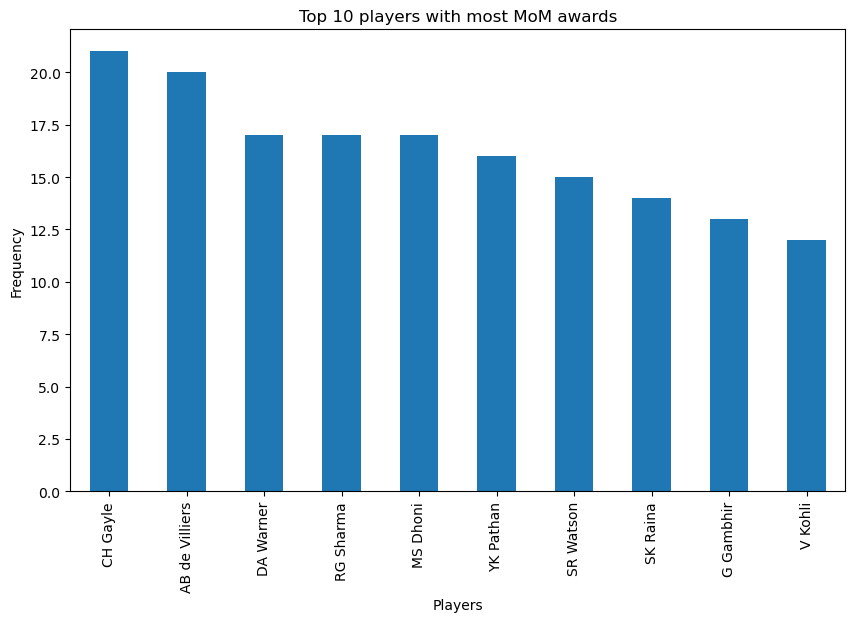

In [151]:
matches['player_of_match'].value_counts().head(10).plot(kind = 'bar',figsize=(10,6))
plt.title("Top 10 players with most MoM awards")
plt.ylabel("Frequency")
plt.xlabel("Players")
plt.show()

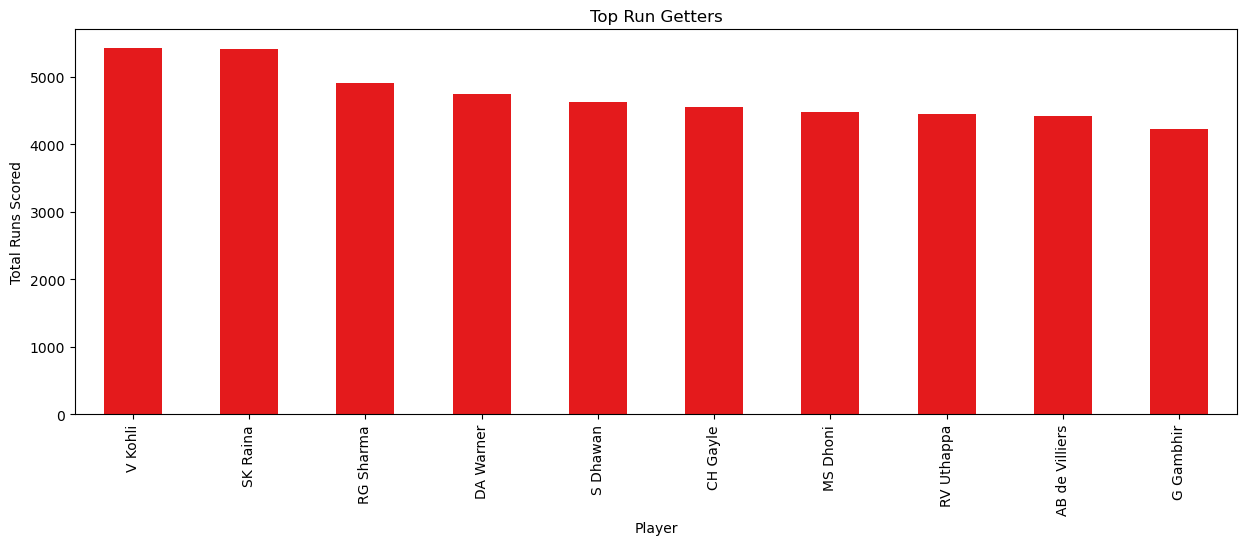

In [152]:
merge_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', colormap = 'Set1',figsize = (15,5))
plt.title("Top Run Getters")
plt.xlabel("Player")
plt.ylabel("Total Runs Scored")
plt.show()

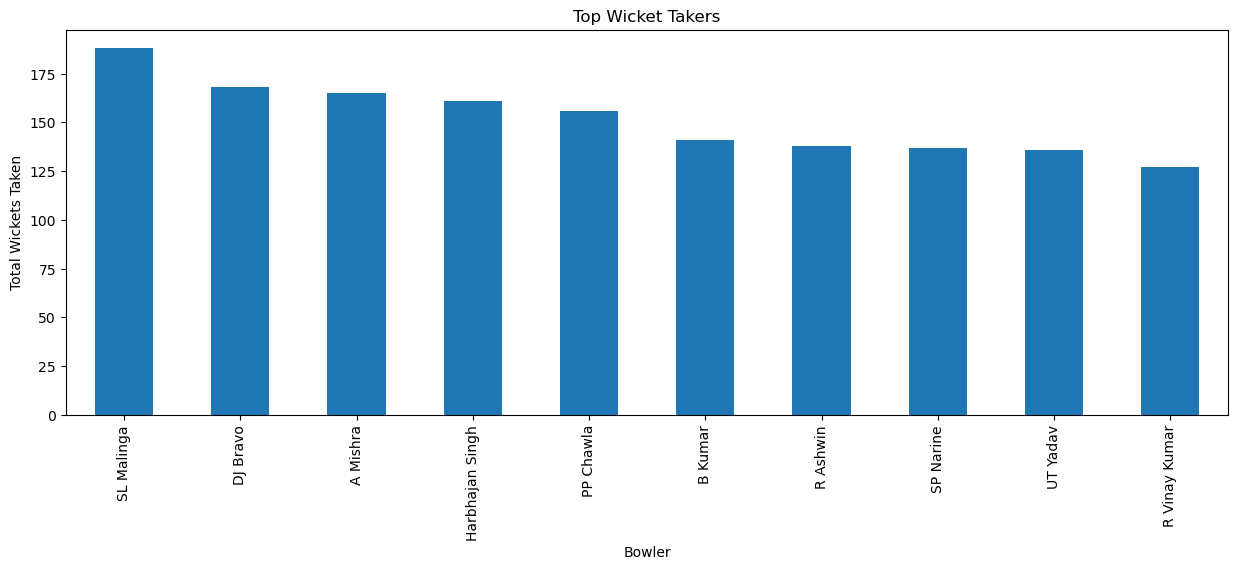

In [153]:
merge_df.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar',colormap = 'tab10', figsize = (15,5))
plt.title("Top Wicket Takers")
plt.xlabel("Bowler")
plt.ylabel("Total Wickets Taken")
plt.show()

In [170]:
seasons = pd.DataFrame(merge_df.groupby('batsman')['season'].nunique())

In [171]:
runs = pd.DataFrame(merge_df.groupby('batsman')['batsman_runs'].sum())

In [172]:
batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

In [174]:
batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
batsman_strike_rate.sort_values(['season', 'strike_rate'], ascending = False).head()

,batsman,balls,run,season,strike_rate
26,AB de Villiers,2977,4428,12,148.740343
509,YK Pathan,2334,3241,12,138.860326
290,MS Dhoni,3318,4477,12,134.930681
428,SK Raina,4044,5415,12,133.902077
166,Harbhajan Singh,632,834,12,131.962025


In [181]:
filtered_batsman_strike_rate = batsman_strike_rate[batsman_strike_rate['balls'] >= 60]
best_strike_rate_batsmen = filtered_batsman_strike_rate.loc[filtered_batsman_strike_rate.groupby('season')['strike_rate'].idxmax()]
best_strike_rate_batsmen

,batsman,balls,run,season,strike_rate
243,LJ Wright,63,106,1,168.253968
209,K Gowtham,86,148,2,172.093023
221,KK Cooper,70,116,3,165.714286
374,RR Pant,1104,1792,4,162.318841
75,BCJ Cutting,146,240,5,164.383562
93,CH Morris,339,520,6,153.392330
34,AD Russell,803,1445,7,179.950187
441,SP Narine,481,803,8,166.943867
188,JA Morkel,712,975,9,136.938202
213,KA Pollard,1964,2784,10,141.751527


In [176]:
bowlers = pd.DataFrame(merge_df.groupby('bowler')['season'].nunique())
balls = pd.DataFrame(merge_df.groupby('bowler')['bowler'].count())
total_runs = pd.DataFrame(merge_df.groupby('bowler')['total_runs'].sum())

In [177]:
bowling_economy = pd.DataFrame({'balls':balls['bowler'],'run':total_runs['total_runs'],'season':bowlers['season']})
bowling_economy.reset_index(inplace = True)

In [178]:
bowling_economy['econ_rate'] = bowling_economy['run']/bowling_economy['balls']*100
bowling_economy.sort_values(['season', 'econ_rate'], ascending = False).tail()

,bowler,balls,run,season,econ_rate
35,AM Rahane,6,5,1,83.333333
306,S Dube,11,9,1,81.818182
357,Sachin Baby,10,8,1,80.000000
241,NB Singh,25,18,1,72.000000
23,AC Gilchrist,1,0,1,0.000000


In [180]:
filtered_bowler_economy_rate = bowling_economy[bowling_economy['balls'] >= 300]
best_economy_rate_bowler = filtered_bowler_economy_rate.loc[filtered_bowler_economy_rate.groupby('season')['econ_rate'].idxmin()]
best_economy_rate_bowler

,bowler,balls,run,season,econ_rate
113,GD McGrath,329,366,1,111.246201
285,RD Chahar,333,376,2,112.912913
6,A Kumble,983,1089,3,110.783316
103,DP Nannes,689,815,4,118.287373
286,RE van der Merwe,455,515,5,113.186813
55,B Lee,916,1126,6,122.925764
207,M Muralitharan,1581,1765,7,111.638204
347,SP Narine,2600,2939,8,113.038462
340,SL Malinga,2974,3511,9,118.056490
108,DW Steyn,2207,2454,10,111.191663
